# Обучение без учителя


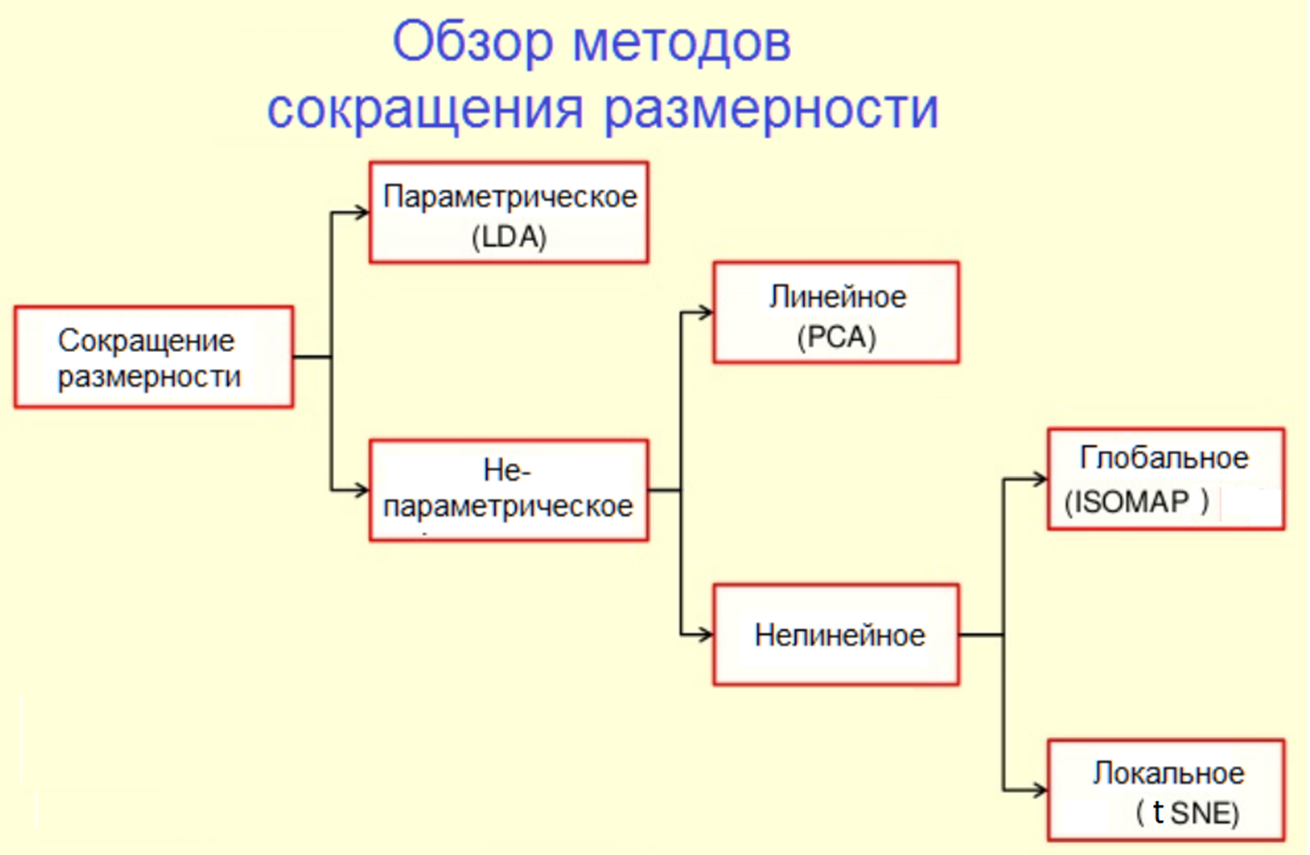

## Подготовка датасета

In [70]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
# Присвоим переменной «url» ссылку на датасет:

dataset = pd.read_csv('Dry_Bean.csv')
# dataset = dataset.drop(['Extent', 'Solidity', 'ShapeFactor3', 'ShapeFactor4'], axis=1)
# dataset = dataset.drop(dataset[dataset['Class'].isin(['HOROZ', 'CALI', 'SEKER', 'SIRA'])].index, inplace=False)

# Получить длину датасета
num_rows = dataset.shape[0]

print("Длина датасета:", num_rows)
print(dataset.head())

Длина датасета: 13611
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.

In [72]:
vals = dataset["Class"].unique()
vals

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

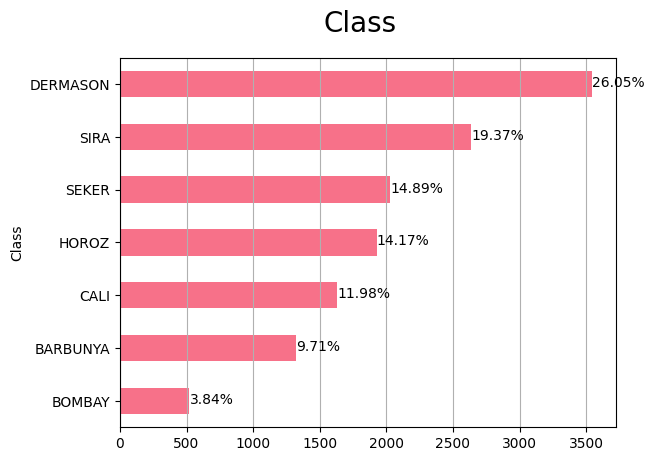

In [73]:
ax = dataset["Class"].value_counts().sort_values().plot(kind="barh")

totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.20,
            str(round((i.get_width()/total)*100, 2))+'%',
            fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle("Class", fontsize=20)

plt.show()

In [74]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем
cols_for_clusters = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea',
                     'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea',
                     'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']

# Нормализовать количественные признаки
scaler = StandardScaler()
dataset[cols_for_clusters] = scaler.fit_transform(dataset[cols_for_clusters])

df= dataset[cols_for_clusters].copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных


In [75]:
X = df
y = dataset["Class"].replace(vals, [0, 1, 2, 3, 4, 5, 6])
yvals = dataset["Class"]

<ipython-input-75-d5d5ab010ef5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = dataset["Class"].replace(vals, [0, 1, 2, 3, 4, 5, 6])


In [76]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

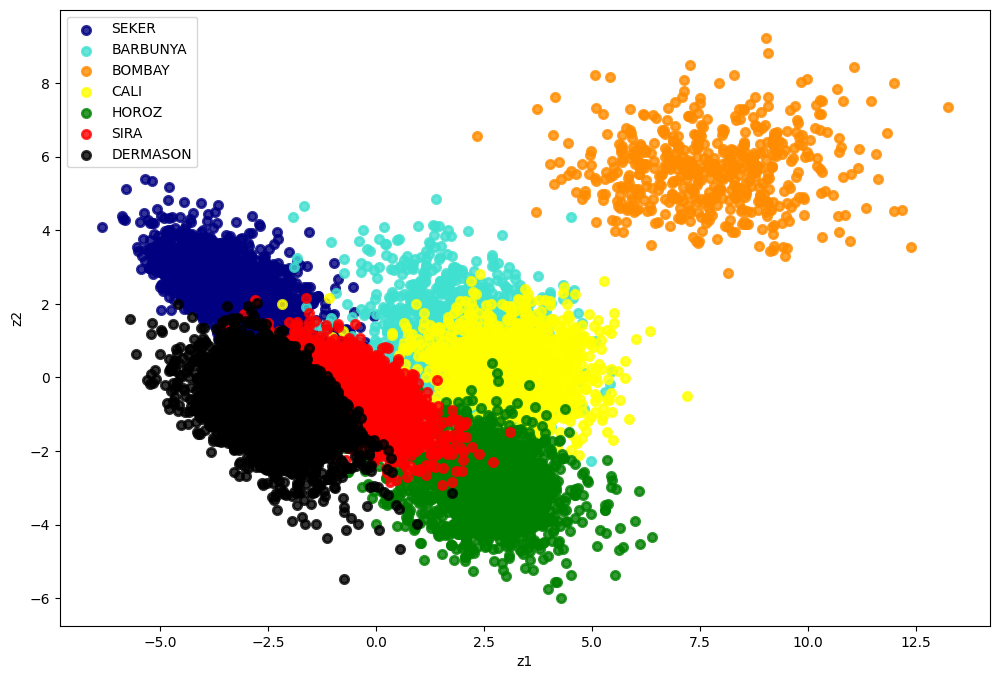

In [77]:
pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)


plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "yellow", "green", "red", "black"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [78]:
pca.explained_variance_ratio_

array([0.55466439, 0.26430973])

Используя только две главные компоненты, мы можем объяснить 81,9% вариации в данных. Это означает, что можно уменьшить размерность данных с многих измерений до всего лишь двух измерений без потери значительной части информации.

In [79]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


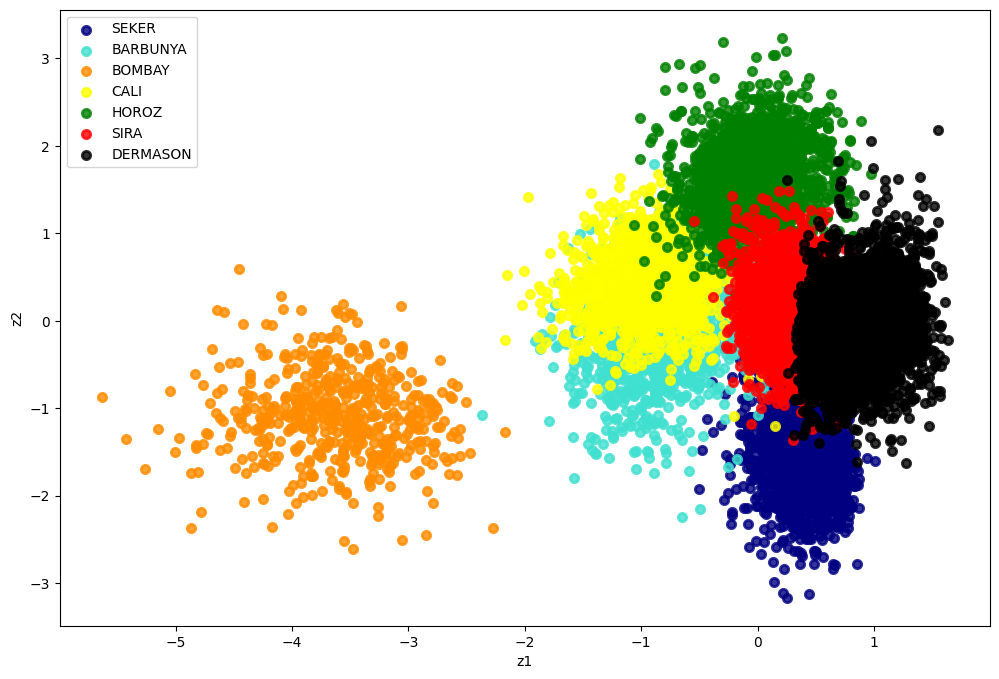

In [80]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "yellow", "green", "red", "black"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [81]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

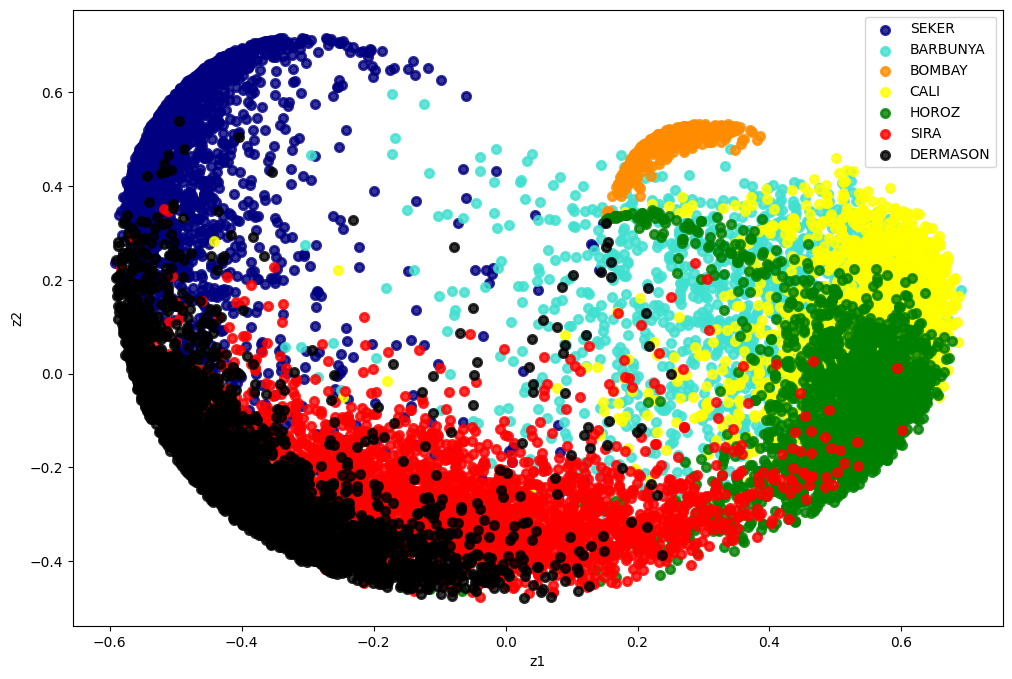

In [82]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "yellow", "green", "red", "black"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [83]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [85]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (13611, 16)
New Shape of X:  (13611, 2)
Kullback-Leibler divergence after optimization:  1.7186514139175415
No. of iterations:  999


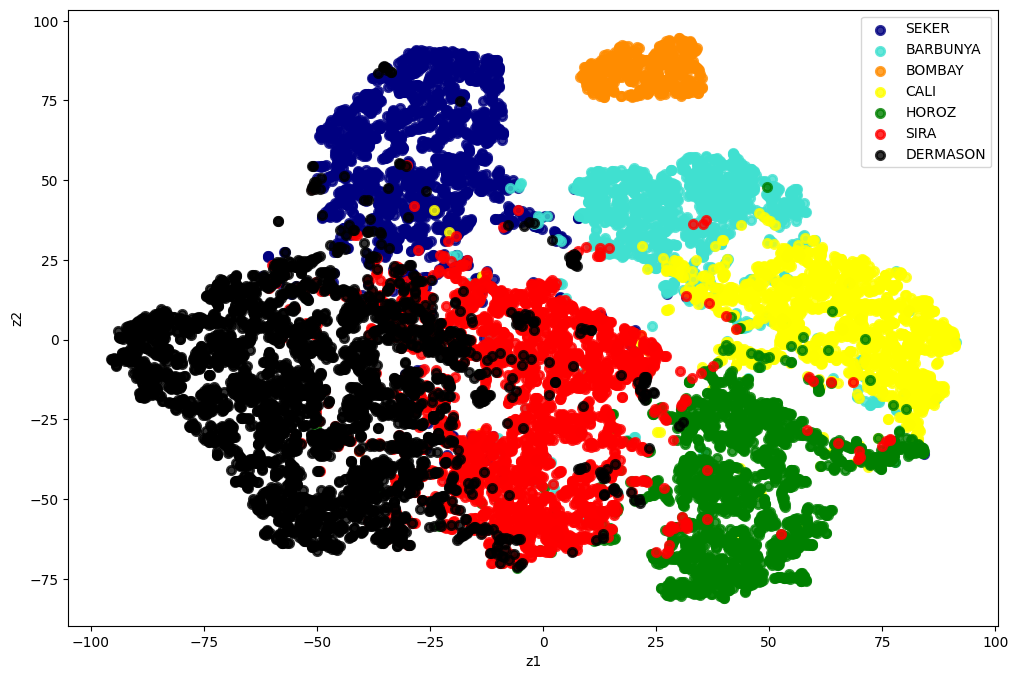

In [86]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "yellow", "green", "red", "black"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

# Поиск выбросов. DBSCAN

DBSCAN расшифровывается как Density-Based Spatial Clustering of Applications with Noise. Он принадлежит к семейству алгоритмов кластеризации с неконтролируемым обучением.

Когда дело доходит до кластеризации, обычно более популярны алгоритмы K-средних или иерархической кластеризации. Но они хорошо работают только тогда, когда кластеры легко обнаружить. Они не дадут хороших результатов, когда кластеры имеют сложные формы или структуры, и именно здесь алгоритм DBSCAN берет верх.

DBSCAN — это алгоритм кластеризации на основе плотности, который предполагает, что кластеры — это плотные области в пространстве, разделенные областями с более низкой плотностью точек данных. Здесь «плотно сгруппированные» точки данных объединяются в один кластер. Мы можем идентифицировать кластеры в больших наборах данных, наблюдая за локальной плотностью точек данных.

Уникальной особенностью кластеризации DBSCAN является то, что она устойчива к выбросам, благодаря чему находит применение в системах обнаружения аномалий. Кроме того, он не требует ввода количества кластеров, в отличие от K-Means, где нам приходится вручную указывать количество центроидов.

**Ключевые характеристики алгоритма DBSCAN**
1. Не требуется количество кластеров в качестве входных данных.
1. Он может обнаруживать выбросы при нахождении кластеров.
1. Алгоритм DBSCAN может обнаруживать кластеры сложной или случайной формы и размера.


## Терминология

1. Эпсилонная стоимость (eps)
  Эпсилон – это радиус окружности вокруг точки данных, так что все остальные точки данных, попадающие внутрь окружности, считаются точками окрестности. Другими словами, две точки считаются соседями, если расстояние между ними меньше или равно eps.

  Если значение eps крайне мало, то большинство точек могут не лежать в окрестности и будут рассматриваться как выбросы. Это приведет к плохой кластеризации, так как большинство точек не удовлетворяют минимальному «нет». точек, необходимых для создания плотной области.

  С другой стороны, если выбрано чрезвычайно высокое значение, то большинство точек данных останутся в том же кластере. Это снова приведет к неправильной кластеризации, при которой несколько кластеров могут в конечном итоге объединиться из-за высокого значения эпсилона.

  В идеале мы должны выбирать значение eps на основе расстояния до набора данных (используя график k-расстояния), однако обычно предпочтение отдается небольшим значениям eps.

2. Минимальное количество точек
  В DBSCAN minPts - это минимальное количество точек данных, которое должно быть в регионе для определения кластера. Вы можете выбрать значение minPts в зависимости от ваших знаний в предметной области. Но если вам не хватает знаний в предметной области, хорошей точкой отсчета будет иметь minPts ≥ D + 1, где D — размерность набора данных.

  Рекомендуется оставлять значение minPts не менее 3, но для больших наборов данных следует выбирать большее значение minPts, особенно если у него много выбросов.

3.  Типы точек в кластеризации DBSCAN
  Исходя из двух вышеуказанных параметров, точку можно классифицировать как:

  **Core point** Центральная точка — это точка, в которой по крайней мере минимальное количество точек (включая саму точку) в окружающей ее области в радиусе eps.

  **Border point** Пограничная точка – это точка, в которой можно добраться из центральной точки, и в пределах окружающего ее региона насчитывается менее минимального количества точек.

  **Outlier** Выброс не является ключевой точкой и не может быть достигнут из каких-либо основных точек.

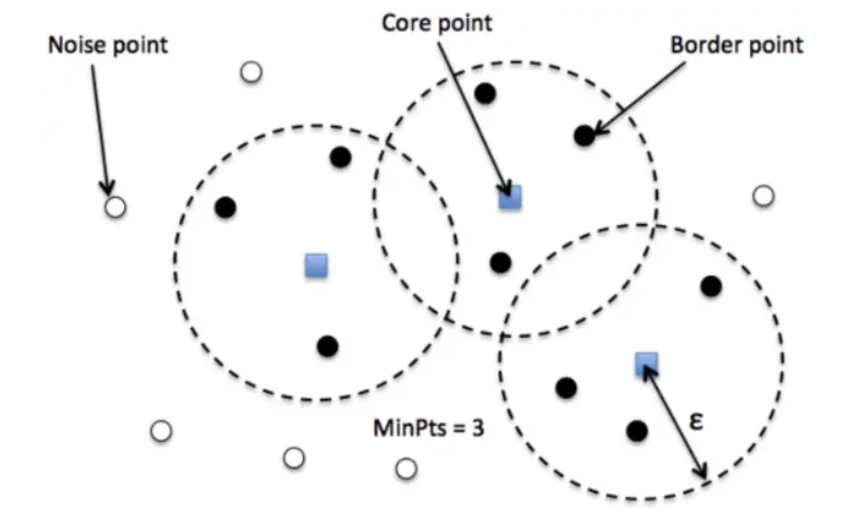

## Алгоритм

Мы начинаем с точек данных и значений эпсилона и minPts в качестве входных данных:

1. Выбираем случайную отправную точку, которая еще не была посещена.
1. Определите окрестности этой точки с помощью эпсилона, который по сути выступает в роли радиуса.
1. сли точки в окрестности удовлетворяют критериям minPts, то точка помечается как точка ядра. Начнется процесс кластеризации, и точка будет помечена как посещенная, в противном случае эта точка будет помечена как шумовая.
1. Все точки в окрестности центральной точки также помечаются как часть кластера, и описанная выше процедура из шага 2 повторяется для всех точек окрестности эпсилон.
Извлекается новая непосещенная точка, и после описанных выше шагов они либо включаются в состав другого кластера, либо помечаются как шум.
1. Вышеуказанный процесс продолжается до тех пор, пока не будут посещены все точки.

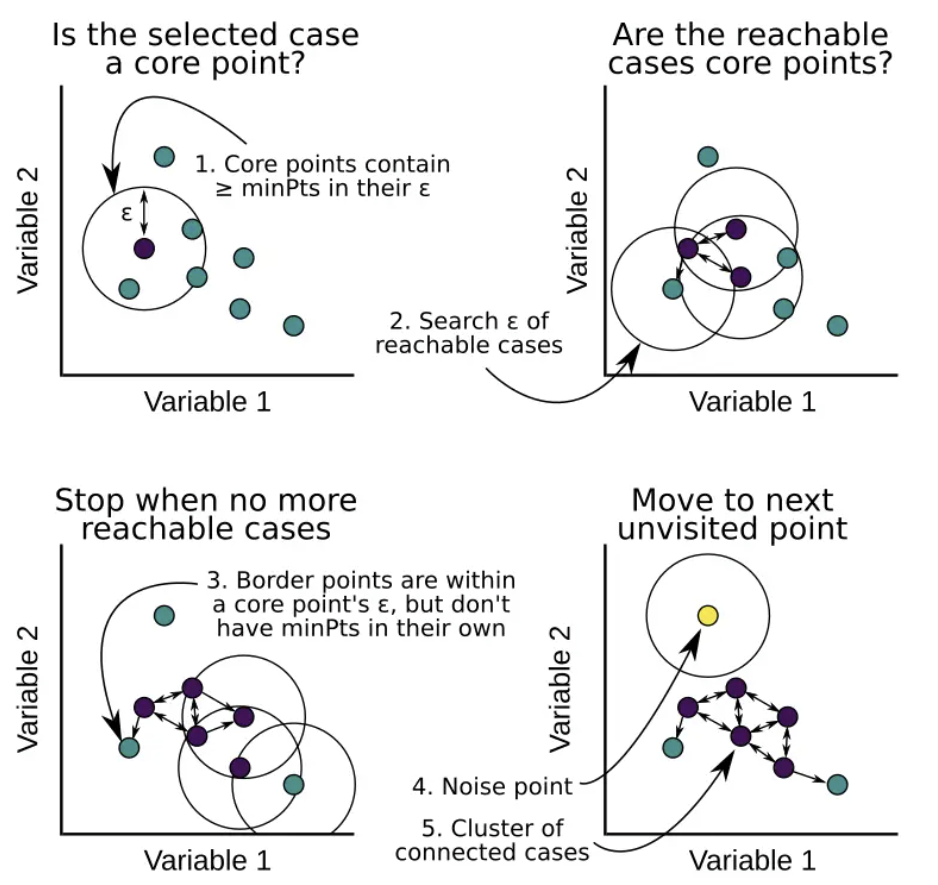

## DBSCAN для кластеризации

In [87]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [156]:
dbscan_cluster1 = DBSCAN(eps = 1.38, min_samples = 3)
X_new = dbscan_cluster1.fit(X)

In [157]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 7
Estimated no. of noise points: 180
v_measure = 0.1574123871128675


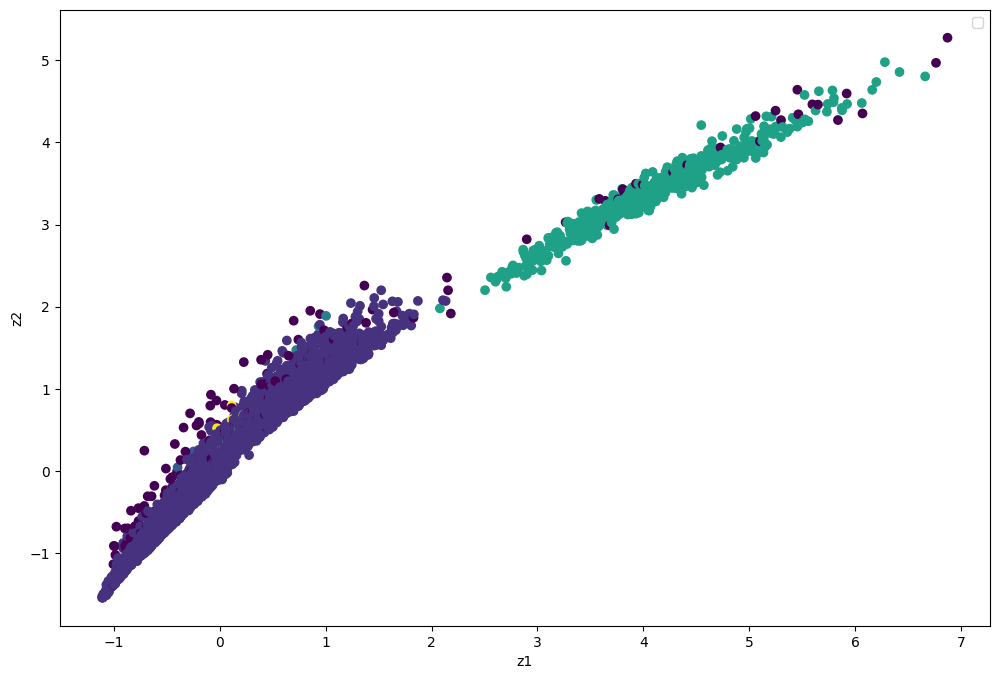

In [158]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "yellow", "green", "red", "black"]
lw = 2

plt.scatter(
        X[cols[0]], X[cols[1]],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Чтобы правильно опрделить число eps, воспользуемся правилом локтя.

Для этого выведем график изменения средних расстояний от каждой точки до min_samples ближайших.

Подробнее о NearestNeighbors можно почитать тут:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors

In [159]:
from sklearn.neighbors import NearestNeighbors

min_samples = 3

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [160]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

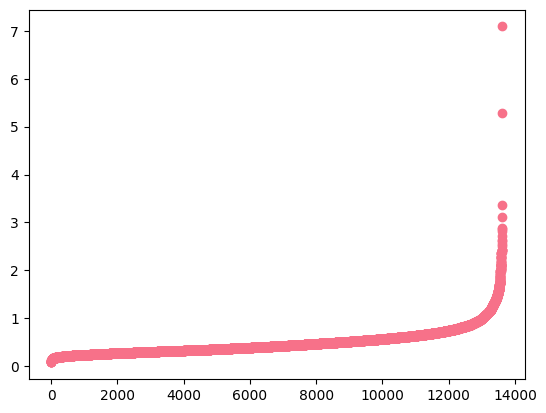

In [161]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

eps  выбирают в точке изгиба графика

## DBSCAN для определения выбросов

In [162]:
dbscan = DBSCAN(eps = 1.38, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=1.38, min_samples=3)


In [163]:
pred = dbscan.fit_predict(X)

In [164]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 7
Estimated no. of noise points: 180
v_measure = 0.1574123871128675


In [165]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

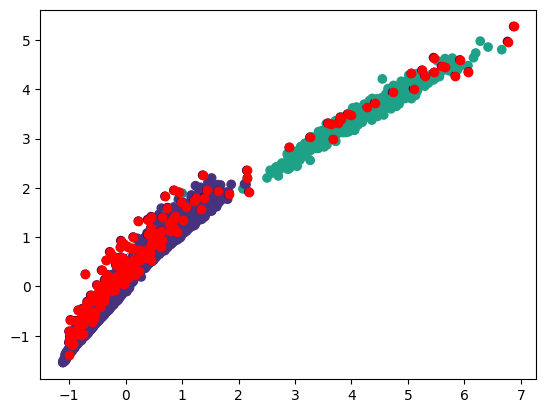

In [166]:
plt.scatter( X[cols[0]], X[cols[1]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols[0]], values[cols[1]], color='r')
plt.show()